In [1]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
#!pip3 install scikit-learn -q

In [3]:
import pandas as pd 
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def drug_response_curve(x, Einf, EC50, HS, E0=100):
    y = Einf + (E0 - Einf)/(1 + (x/EC50)**HS)
    return y

In [5]:
def r2_drug_response(df):
    dose_response = df['dose_response'].values
    Einf = df['Einf'].values
    EC50 = df['EC50'].values
    HS = df['HS'].values
    r2 = np.zeros(len(dose_response))
    for i in range(len(dose_response)):
        doses_i = []
        responses_i = []
        responses_pred_i = []
        for j in range(len(dose_response[i])):
            doses_i.append(dose_response[i][j]['dose'])
            responses_i.append(dose_response[i][j]['response'])
        for dose in doses_i:
            responses_pred_i.append(drug_response_curve(dose, Einf[i], EC50[i], HS[i]).item())
        
        r2[i] = r2_score(responses_i, responses_pred_i)
        #print(r2_score(responses_i, responses_pred_i))
        #break
    return r2

In [6]:
def calc_responses(df, dose):
    Einf = df['Einf'].values
    EC50 = df['EC50'].values
    HS = df['HS'].values
    n_curves = df.shape[0]
    #r2 = np.zeros(len(dose_response))
    responses_pred = np.zeros(n_curves)
    for i in range(n_curves):
        responses_pred[i] = drug_response_curve(dose, Einf[i], EC50[i], HS[i]).item()
    return responses_pred

In [7]:
df = pd.read_parquet('../../NO_BACKUP/tahoe/responses_overlap.parquet')
df_cnt = df.groupby('dataset').size().reset_index(name='counts')
df_cnt

,dataset,counts
0,CCLE,155
1,CTRPv2,1056
2,FIMM,34
3,GDSC1,1257
4,GDSC2,2687
5,GRAY,81
6,NCI60,25192
7,PRISM,3515
8,UHNBreast,6
9,gCSI,236


In [8]:
df#['dose_response']#.iloc[0]

,exp_id,comp_id,uid,compound,tissue,HS,Einf,EC50,AAC,IC50,...,DSS3,dose_response,dataset,cell_line_id,id_y,accession_id,id,inchikey,pubchem,cell_line_drug
0,43925,3563,PDBC02842,(S)-Crizotinib,Bladder/Urinary Tract,2.953917,1.872801,1.720438,0.179634,1.742817,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,30,30.0,CVCL_0359,3563.0,KTEIFNKAUNYNJU-LBPRGKRZSA-N,56671814,CVCL_0359_56671814
1,43979,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.870155,52.820948,5.785605,0.144949,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0041...",CTRPv2,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385
2,43980,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.517706,70.793877,10.654282,0.093841,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.125,...",GDSC1,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385
3,43981,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.000000,97.252047,38.108568,0.013740,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0320...",GDSC2,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385
4,43982,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.495729,70.441511,0.152708,0.189125,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0632...",GDSC2,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34214,6259947,53571,PDBC00262,Vemurafenib,Uterus,4.000000,47.197225,1.831846,0.092368,3.764734,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1676,1676.0,CVCL_0293,53571.0,GPXBXXGIAQBQNI-UHFFFAOYSA-N,42611257,CVCL_0293_42611257
34215,6259948,53571,PDBC00262,Vemurafenib,Uterus,1.015135,100.000000,7.745478,0.000000,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1676,1676.0,CVCL_0293,53571.0,GPXBXXGIAQBQNI-UHFFFAOYSA-N,42611257,CVCL_0293_42611257
34216,6259962,53625,PDBC00032,Vismodegib,Uterus,4.000000,0.000000,11.405765,0.011961,11.405765,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1676,1676.0,CVCL_0293,53625.0,BPQMGSKTAYIVFO-UHFFFAOYSA-N,24776445,CVCL_0293_24776445
34217,6259963,53625,PDBC00032,Vismodegib,Uterus,0.000000,100.000000,0.007236,0.000000,NaN,...,None,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,1676,1676.0,CVCL_0293,53625.0,BPQMGSKTAYIVFO-UHFFFAOYSA-N,24776445,CVCL_0293_24776445


In [9]:
#remove experiments with the unknown constants
df = df[~df[['HS', 'Einf', 'EC50']].isna().any(axis=1)].reset_index(drop=True)
#calc r2 score of fitting drug-response curve
df['r2'] = r2_drug_response(df)

([<matplotlib.axis.XTick at 0x7f83ce6ac550>], [Text(1, 0, 'r2_pos')])

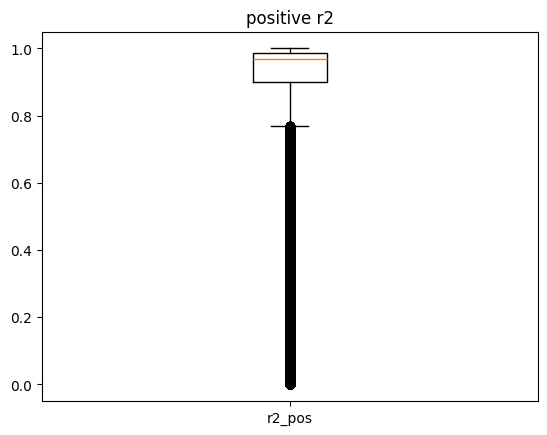

In [10]:
plt.title('positive r2')
plt.boxplot(df[df['r2'] > 0]['r2'])
plt.xticks([1], ['r2_pos'])
#plt.ylim([-500, 1])

([<matplotlib.axis.XTick at 0x7f843a48cdd0>], [Text(1, 0, 'r2_neg')])

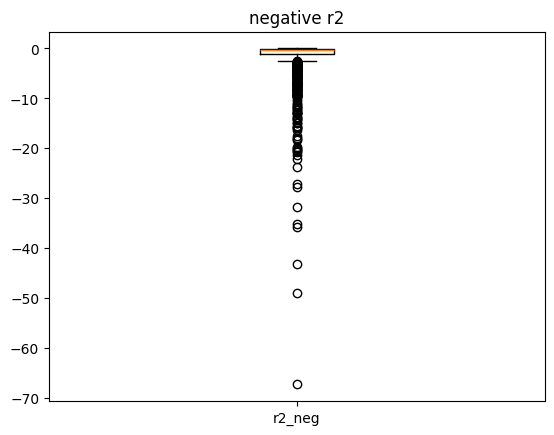

In [11]:
plt.title('negative r2')
plt.boxplot(df[df['r2'] <= 0]['r2'])
plt.xticks([1], ['r2_neg'])
#plt.ylim([-500, 1])

In [15]:
len(df[df['r2'] > 0.7]['cell_line_id'].unique())

47

In [18]:
len(df[df['r2'] > 0.7]['cell_line_drug'].unique())

2110

In [19]:
df_top_r2 = df[df['r2'] > 0.7].reset_index(drop=True)

In [20]:
df_top_r2_cnt = df_top_r2.groupby('dataset').size().reset_index(name='counts')

In [21]:
df_top_r2_cnt['fraction'] = df_top_r2_cnt['counts']/df.groupby('dataset').size().reset_index(name='counts')['counts']

(array([  308.,   374.,   421.,   478.,   607.,   843.,  1249.,  2156.,
         5687., 15054.]),
 array([0.7000088 , 0.73000769, 0.76000658, 0.79000546, 0.82000435,
        0.85000324, 0.88000212, 0.91000101, 0.9399999 , 0.96999878,
        0.99999767]),
 <BarContainer object of 10 artists>)

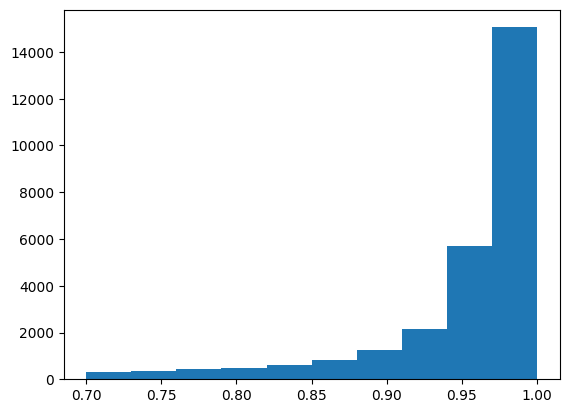

In [22]:
plt.hist(df_top_r2['r2'])

In [24]:
df_top_r2.rename(columns={'comp_id': 'compound_id', 'cell_line_id': 'cellline_id'}).to_parquet('../../NO_BACKUP/tahoe/drug_response_curves.parquet', index=False)

,exp_id,compound_id,uid,compound,tissue,HS,Einf,EC50,AAC,IC50,...,dose_response,dataset,cellline_id,id_y,accession_id,id,inchikey,pubchem,cell_line_drug,r2
0,43979,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.870155,52.820948,5.785605,0.144949,NaN,...,"[{'__typename': 'DoseResponse', 'dose': 0.0041...",CTRPv2,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385,0.908021
1,43980,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.517706,70.793877,10.654282,0.093841,NaN,...,"[{'__typename': 'DoseResponse', 'dose': 0.125,...",GDSC1,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385,0.903998
2,43982,23375,PDBC00173,5-Fluorouracil,Bladder/Urinary Tract,0.495729,70.441511,0.152708,0.189125,NaN,...,"[{'__typename': 'DoseResponse', 'dose': 0.0632...",GDSC2,30,30.0,CVCL_0359,23375.0,GHASVSINZRGABV-UHFFFAOYSA-N,3385,CVCL_0359_3385,0.759790
3,44006,26643,PDBC03077,8-Hydroxyquinoline,Bladder/Urinary Tract,4.000000,0.000000,6.176241,0.053157,6.176241,...,"[{'__typename': 'DoseResponse', 'dose': 0.0006...",PRISM,30,30.0,CVCL_0359,26643.0,MCJGNVYPOGVAJF-UHFFFAOYSA-N,1923,CVCL_0359_1923,0.785664
4,44098,27719,PDBC00049,AZD8055,Bladder/Urinary Tract,0.330061,45.519561,0.012379,0.380414,18.483823,...,"[{'__typename': 'DoseResponse', 'dose': 0.002,...",CTRPv2,30,30.0,CVCL_0359,27719.0,KVLFRAWTRWDEDF-IRXDYDNUSA-N,25262965,CVCL_0359_25262965,0.762690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27172,6259888,53207,PDBC01269,Trifluridine,Uterus,3.650153,27.484692,0.168943,0.301057,0.210215,...,"[{'__typename': 'DoseResponse', 'dose': 0.0005...",PRISM,1676,1676.0,CVCL_0293,53207.0,VSQQQLOSPVPRAZ-RRKCRQDMSA-N,6256,CVCL_0293_6256,0.916029
27173,6259934,53552,PDBC00375,Valdecoxib,Uterus,1.371047,10.263694,81.733973,0.175727,96.645343,...,"[{'__typename': 'DoseResponse', 'dose': 0.018,...",CTRPv2,1676,1676.0,CVCL_0293,53552.0,LNPDTQAFDNKSHK-UHFFFAOYSA-N,119607,CVCL_0293_119607,0.923116
27174,6259937,53559,PDBC00148,Vandetanib,Uterus,4.000000,60.502069,2.306921,0.060941,NaN,...,"[{'__typename': 'DoseResponse', 'dose': 0.0025...",CCLE,1676,1676.0,CVCL_0293,53559.0,UHTHHESEBZOYNR-UHFFFAOYSA-N,3081361,CVCL_0293_3081361,0.784035
27175,6259938,53559,PDBC00148,Vandetanib,Uterus,1.002582,0.000000,14.569703,0.164243,14.569703,...,"[{'__typename': 'DoseResponse', 'dose': 0.002,...",CTRPv2,1676,1676.0,CVCL_0293,53559.0,UHTHHESEBZOYNR-UHFFFAOYSA-N,3081361,CVCL_0293_3081361,0.914577


In [25]:
df_top_r2_explode = df_top_r2.explode('dose_response')

In [26]:
df_top_r2_explode['response_pred'] = df_top_r2_explode.apply(lambda x: drug_response_curve(x.dose_response['dose'], x.Einf, x.EC50, x.HS), axis=1)

In [27]:
r2_score(df_top_r2_explode.dose_response.str['response'], df_top_r2_explode['response_pred'])

0.964509928705675

(array([ 3257.,  7145., 10866., 14531., 14345., 13595., 14176., 15493.,
        15764., 41152.]),
 array([9.3621991e-12, 1.0000000e+01, 2.0000000e+01, 3.0000000e+01,
        4.0000000e+01, 5.0000000e+01, 6.0000000e+01, 7.0000000e+01,
        8.0000000e+01, 9.0000000e+01, 1.0000000e+02]),
 <BarContainer object of 10 artists>)

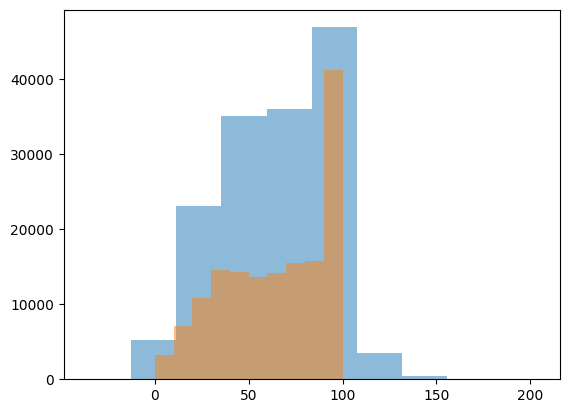

In [28]:
plt.hist(df_top_r2_explode.dose_response.str['response'], alpha=0.5)
plt.hist(df_top_r2_explode['response_pred'], alpha=0.5)

(array([ 3257.,  7145., 10866., 14531., 14345., 13595., 14176., 15493.,
        15764., 41152.]),
 array([9.3621991e-12, 1.0000000e+01, 2.0000000e+01, 3.0000000e+01,
        4.0000000e+01, 5.0000000e+01, 6.0000000e+01, 7.0000000e+01,
        8.0000000e+01, 9.0000000e+01, 1.0000000e+02]),
 <BarContainer object of 10 artists>)

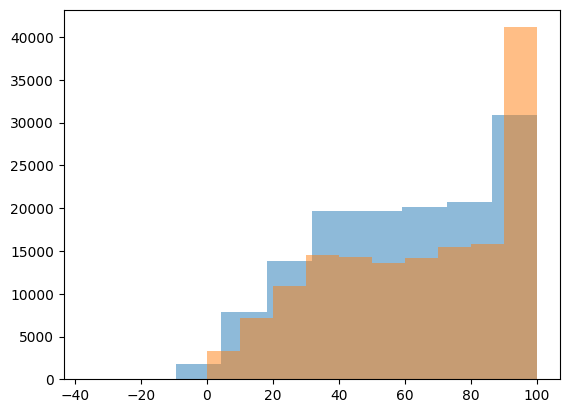

In [29]:
plt.hist(df_top_r2_explode[df_top_r2_explode.dose_response.str['response']<100].dose_response.str['response'], alpha=0.5)
plt.hist(df_top_r2_explode['response_pred'], alpha=0.5)

(array([0.00216665, 0.00475307, 0.00722839, 0.00966645, 0.00954272,
        0.0090438 , 0.0094303 , 0.0103064 , 0.01048668, 0.02737554]),
 array([9.3621991e-12, 1.0000000e+01, 2.0000000e+01, 3.0000000e+01,
        4.0000000e+01, 5.0000000e+01, 6.0000000e+01, 7.0000000e+01,
        8.0000000e+01, 9.0000000e+01, 1.0000000e+02]),
 <BarContainer object of 10 artists>)

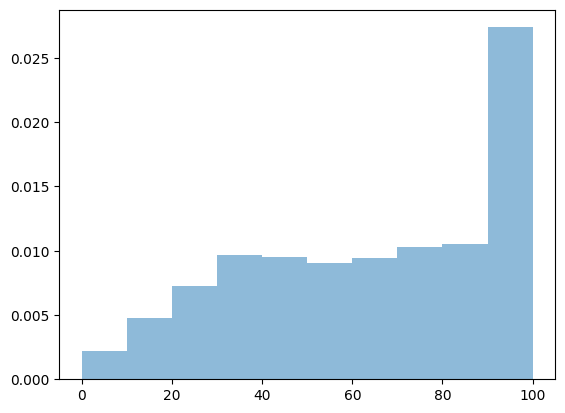

In [30]:
plt.hist(df_top_r2_explode['response_pred'], density=True, alpha=0.5)